In this notebook I am [Stumpy](https://stumpy.readthedocs.io/en/latest/) for time series data mining tasks. The data used is collected by JHU CSSE and [available at](https://github.com/CSSEGISandData/COVID-19)

Stumpy is a powerful and scalable library which computes matrix profile and can be used for a variety of tasks such as:

* pattern/motif (approximately repeated subsequences within a longer time series) discovery
* anomaly/novelty (discord) discovery
* semantic segmentation
* density estimation

A matrix profile is a vector that stores the z-normalized Euclidean distance between any subsequence within a time series and its nearest neigbor. Subsequence is a part or section of the full time series. Each subsequence can have a different sequence length and compare any two subsequences of the same length. Euclidean Distance is the straight-line distance between two points. Distance Profile is a vector of pairwise Euclidean distances where one subsequence is the same (reference subsequence) while the second subsequence changes in a sliding window manner to compute the Euclidean distance for each window. Matrix profile is only interested in storing the smallest non-trivial distances from each distance profile, which significantly reduces the spatial complexity to O(n). Please refer [here](https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html) for more information.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import suptitle
import matplotlib.style as style
from IPython.display import display, HTML
import stumpy
warnings.filterwarnings('ignore')
# Set some parameters
pd.set_option('display.width',170, 'display.max_rows',10, 'display.max_columns',30)
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Automatically resize and create the plots 
def change_plot_size(width, height, plt):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams['xtick.direction'] = 'out'

In [3]:
# create time series dataframe except a region
def create_dataframe(file, region):
    df = pd.read_csv(file)
    df1 = df[df['Country/Region'] != region]
    df1.drop(['Province/State', 'Country/Region','Lat', 'Long'], axis = 1, inplace = True)
    df2 = df1.sum()  
    return df2

In [4]:
# create time series dataframe with a region
def create_dataframe_china(file, region):
    df = pd.read_csv(file)
    df1 = df[df['Country/Region'] == region]
    df1.drop(['Province/State', 'Country/Region','Lat', 'Long'], axis = 1, inplace = True)
    df2 = df1.sum()  
    return df2
    

According to [this paper](https://academic.oup.com/nsr/advance-article/doi/10.1093/nsr/nwaa036/5775463)

"Population genetic analyses of 103 SARS-CoV-2 genomes has indicated that the viruses have evolved into two major types (designated L and S). Although the L type (∼70%) is more prevalent than the S type (∼30%), the S type was found to be the ancestral version. Whereas the L type was more prevalent in the early stages of the outbreak in Wuhan, the frequency of the L type decreased after early January 2020. 

Human intervention may have placed more severe selective pressure on the L type, which might be more aggressive and spread more quickly. On the other hand, the S type, which is evolutionarily older and less aggressive, might have increased in relative frequency due to relatively weaker selective pressure."

### Lets us do some data mining of the cases except Mainland China

In [5]:
confirmed = create_dataframe("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv","Mainland China")
death = create_dataframe("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv","Mainland China")
recovered = create_dataframe("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv","Mainland China")

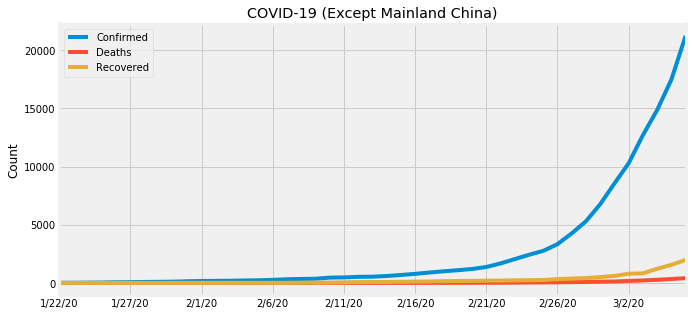

In [6]:
change_plot_size(10, 5, plt)
ax = confirmed.plot(label='Confirmed')
ax = death.plot(label='Deaths')
ax = recovered.plot(label='Recovered')
ax.set_ylabel('Count')
plt.legend(loc="upper left")
plt.title('COVID-19 (Except Mainland China)')
plt.show()

#### Novelty in time series is non-repeated subsequences found within a longer time series. The matrix profile index indicates the subsequence that does not have nearest neighbor that resembles itself. 

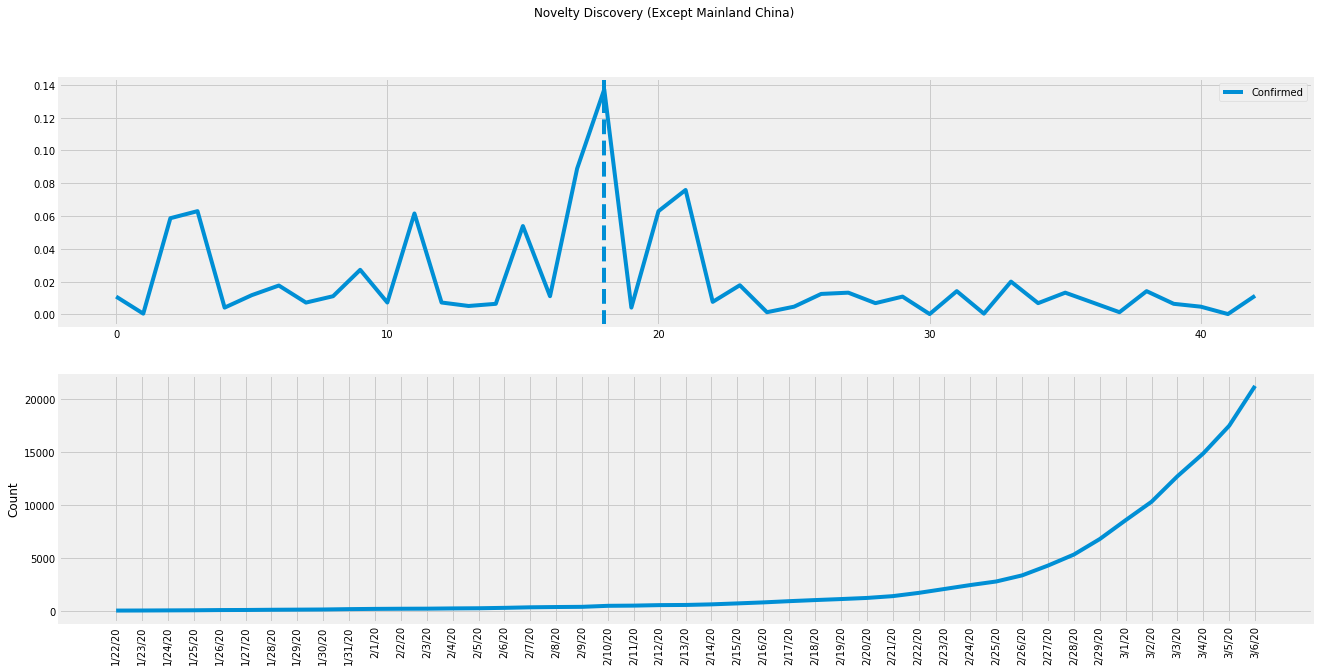

In [7]:
# Matrix Profile
m = 3
mp = stumpy.stump(confirmed, m)
mp1 = stumpy.stump(death, m)
mp2 = stumpy.stump(recovered, m)

change_plot_size(20, 10, plt)
fig, axs = plt.subplots(2, gridspec_kw={'hspace': 0.2})
plt.suptitle('Novelty Discovery (Except Mainland China)')

axs[0].plot(mp[:, 0], label='Confirmed')
axs[0].axvline(x=18, linestyle="dashed")

axs[1].plot(confirmed.index,confirmed.values)
axs[1].set_ylabel('Count', rotation = 'vertical')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].legend(loc="upper right")
plt.show()

The numbers of confirmed cases are growing. However, the first hike in the number of cases reported as confirmed happened on 10th February 2010.
Global death toll passes 1,000
https://edition.cnn.com/asia/live-news/coronavirus-outbreak-02-10-20-intl-hnk/index.html

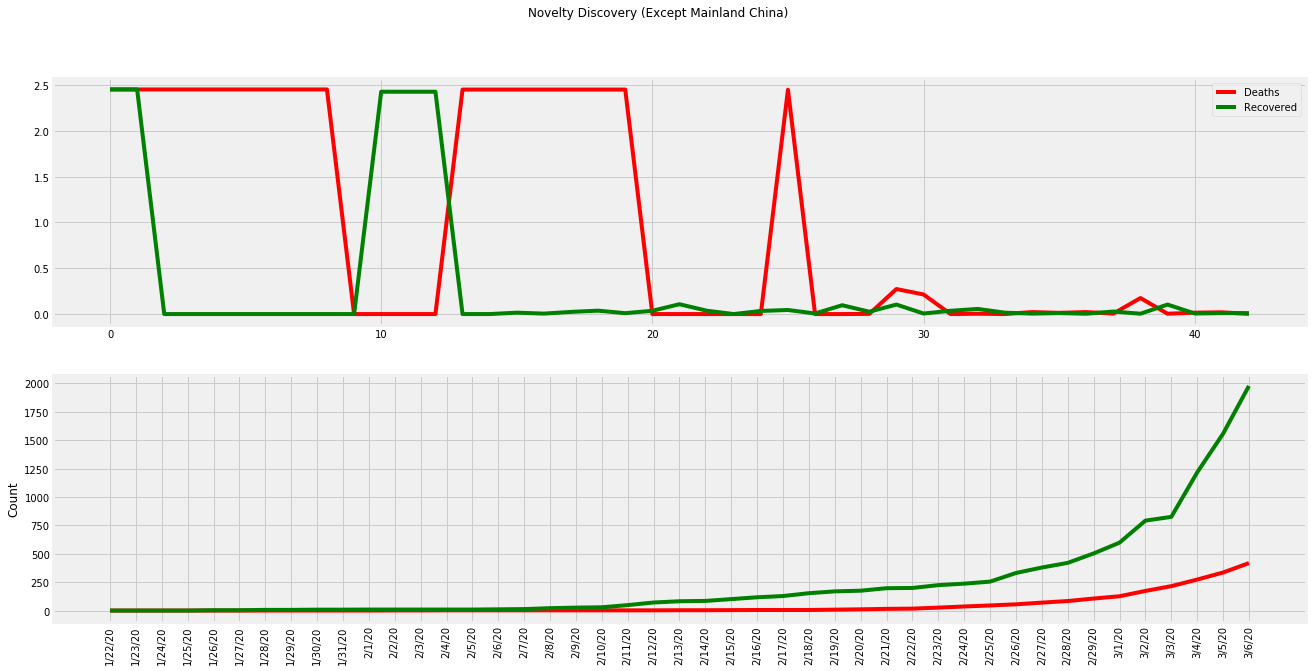

In [8]:
fig, axs = plt.subplots(2, gridspec_kw={'hspace': 0.2})
plt.suptitle('Novelty Discovery (Except Mainland China)')
axs[0].plot(mp1[:, 0],label='Deaths' , color = 'red')
axs[0].plot(mp2[:, 0],label='Recovered' , color = 'green')
axs[1].plot(death.index,death.values, color = 'red')
axs[1].plot(recovered.index,recovered.values, color = 'green')
axs[1].set_ylabel('Count', rotation = 'vertical')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].legend(loc="upper right")
plt.show()

### Mainland China

In [9]:
c_confirmed = create_dataframe_china("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv","Mainland China")
c_death = create_dataframe_china("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv","Mainland China")
c_recovered = create_dataframe_china("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv","Mainland China")

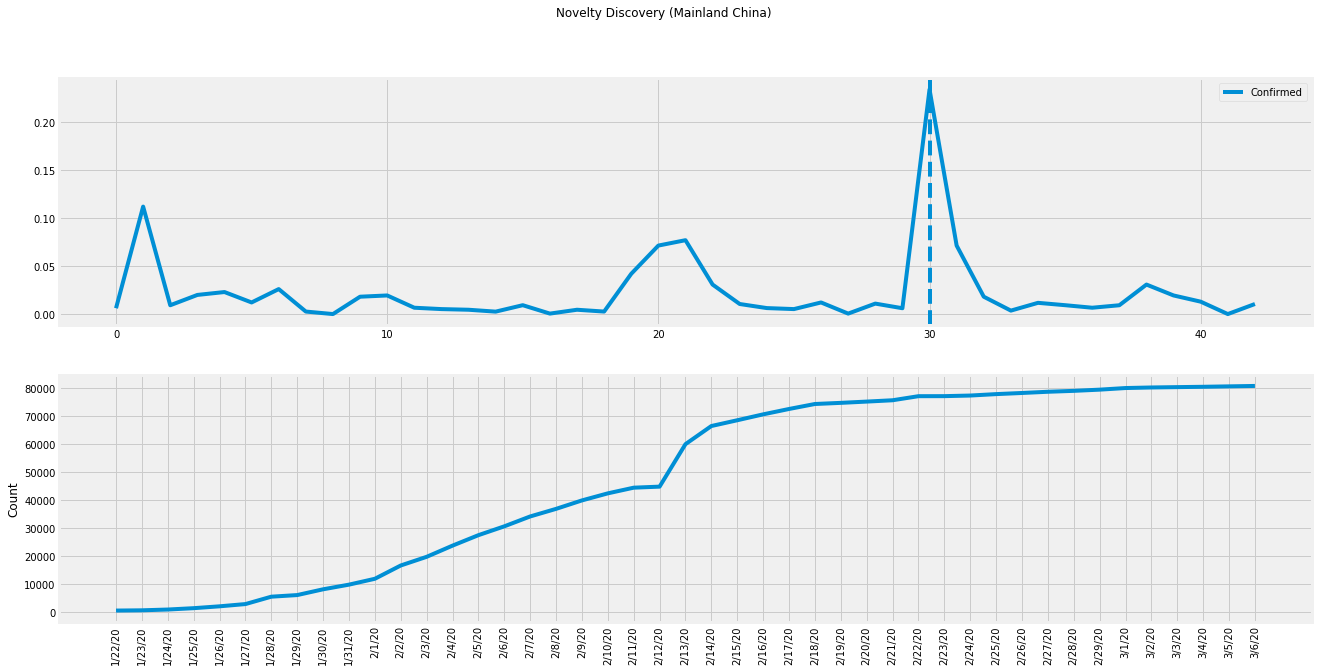

In [10]:
# Matrix Profile
m = 3
mp4 = stumpy.stump(c_confirmed, m)
mp5 = stumpy.stump(c_death, m)
mp6 = stumpy.stump(c_recovered, m)

change_plot_size(20, 10, plt)
fig, axs = plt.subplots(2, gridspec_kw={'hspace': 0.2})
plt.suptitle('Novelty Discovery (Mainland China)')
axs[0].plot(mp4[:, 0], label='Confirmed')
axs[0].axvline(x=30, linestyle="dashed")
axs[1].plot(c_confirmed.index,c_confirmed.values)
axs[1].set_ylabel('Count', rotation = 'vertical')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].legend(loc="upper right")
plt.show()

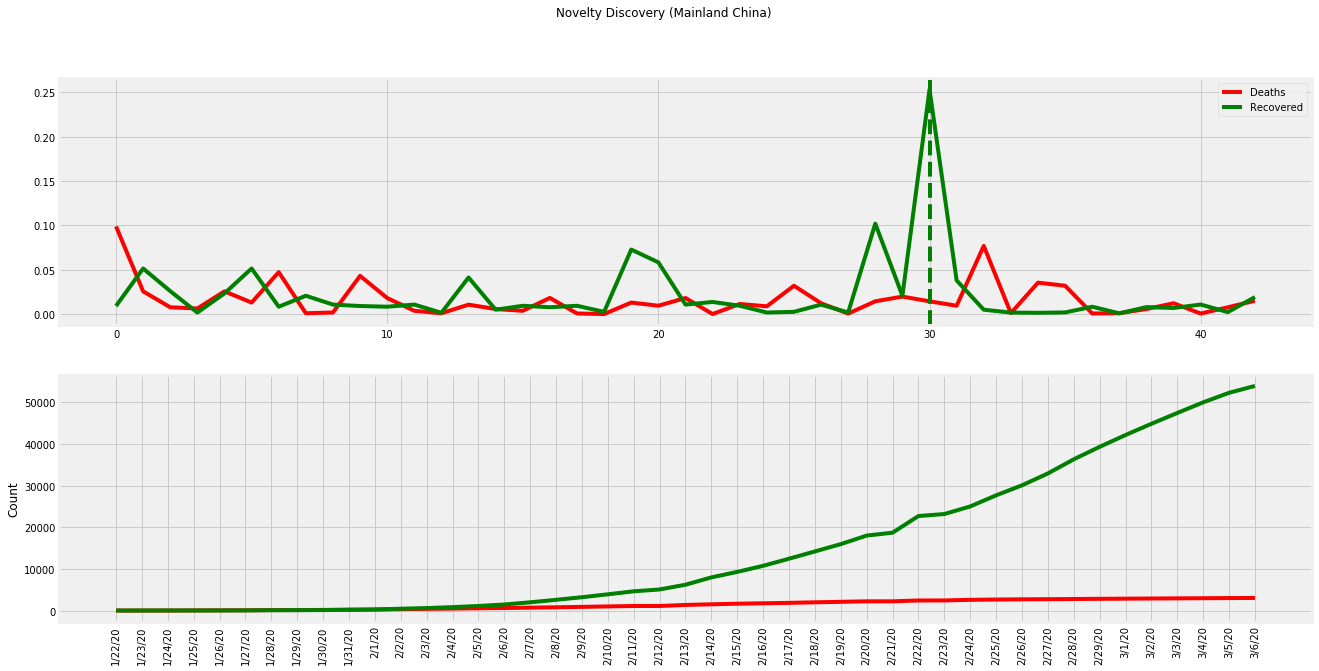

In [11]:
fig, axs = plt.subplots(2, gridspec_kw={'hspace': 0.2})
plt.suptitle('Novelty Discovery (Mainland China)')
axs[0].plot(mp5[:, 0],label='Deaths', color = 'red')
axs[0].axvline(x=30, linestyle="dashed", color = 'green')
axs[0].plot(mp6[:, 0],label='Recovered', color = 'green')
axs[1].plot(c_death.index,c_death.values , color = 'red')
axs[1].plot(c_recovered.index,c_recovered.values, color = 'green')
axs[1].set_ylabel('Count', rotation = 'vertical')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].legend(loc="upper right")
plt.show()

In mainland China, the numbers of confirmed cases has steadied. However, the novelty discovery happend on 23rd February 2020. Mainland China had 409 new confirmed coronavirus cases on Sunday, the National Health Commission said on Monday, down from 648 reported a day earlier.

The number of new deaths, however, rose to 150 from 97 over the same period, it said in a statement.

https://www.usnews.com/news/world/articles/2020-02-23/china-says-new-coronavirus-cases-drop-to-409-on-february-23-but-deaths-jump-to-150

Looking at these peaks it seems that reporting of these different stages is not being done separately. The numbers are the cases reported are all together.